<a href="https://colab.research.google.com/github/gogifemi/cannabis-health-diagnosis/blob/main/Running_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/gogifemi/cannabis-health-diagnosis.git

Cloning into 'cannabis-health-diagnosis'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 30 (delta 1), reused 0 (delta 0), pack-reused 27 (from 1)
Receiving objects: 100% (30/30), 49.90 MiB | 22.11 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [2]:
!pip install tensorflow

In [3]:
!unzip /content/cannabis-health-diagnosis/data.zip -d /content/cannabis-health-diagnosis/data/

Archive:  /content/cannabis-health-diagnosis/data.zip
   creating: /content/cannabis-health-diagnosis/data/test/
   creating: /content/cannabis-health-diagnosis/data/test/Aphids/
  inflating: /content/cannabis-health-diagnosis/data/test/Aphids/cannabis-marijuana-aphids-outdoor-garden-pests_RQ_jpeg.rf.1d58d5f5e1d120fd5ecad31e9f22a176.jpg  
  inflating: /content/cannabis-health-diagnosis/data/test/Aphids/OIP_jpeg.rf.2d6b866972b2d670a04c1d7b0c3910aa.jpg  
   creating: /content/cannabis-health-diagnosis/data/test/Calcium Deficiency/
  inflating: /content/cannabis-health-diagnosis/data/test/Calcium Deficiency/cannabis-calcium-deficiency-nutrient-deficiencies-yellow-brown-spots-calmag-weed-growing-problems_3Z_jpeg.rf.69898993d8c98cfbe550cc1e0926efd5.jpg  
  inflating: /content/cannabis-health-diagnosis/data/test/Calcium Deficiency/cannabis-calcium-deficiency-nutrient-deficiencies-yellow-brown-spots-calmag-weed-growing-problems_DX_png.rf.cfc31d70ebfb8fe75654bb86966d40f5.jpg  
  inflating: /co

In [4]:
!ls /content/cannabis-health-diagnosis/data/

test  train  valid


In [5]:
data_dir = '/content/cannabis-health-diagnosis/data/'

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


# **Training**

In [6]:
from tensorflow.keras import Sequential,Input,Model
from tensorflow.keras.layers import Dense,Dropout,GlobalAveragePooling2D,Flatten
from tensorflow.keras.preprocessing import image # Keras own inbuild image class
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input
from tensorflow.keras.metrics import Precision, Recall

In [7]:
from tensorflow.keras.optimizers import Adam

In [8]:
from tensorflow.keras.applications.vgg16 import VGG16
# from tensorflow import keras as K
import tensorflow.keras.backend as K
K.clear_session()

#1. Select the convolutional base / Pretrained network
base_model = VGG16(include_top=False, input_shape=(416, 416, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
base_model.trainable= False

In [10]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 416, 416, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 416, 416, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 416, 416, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 208, 208, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 208, 208, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 208, 208, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 104, 104, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 104, 104, 256)       │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 104, 104, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 104, 104, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 52, 52, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 52, 52, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 52, 52, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 52, 52, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 26, 26, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 26, 26, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 26, 26, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 26, 26, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 13, 13, 512)         │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [26]:
inputs = Input(shape=(416,416,3))

base = base_model(inputs)

flatten = Flatten()(base)

outputs = Dense(12,activation='softmax')(flatten)

model_tf = Model(inputs,outputs)

In [27]:
model_tf.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 416, 416, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 13, 13, 512)         │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │       1,038,348 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,753,036 (60.09 MB)

 Trainable params: 1,038,348 (3.96 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [45]:
classes = [
    'Healthy',
    'Manganese Deficiency',
    'Phosphorus Deficiency',
    'Potassium Deficiency',
    'Calcium Deficiency',
    'PH Fluctuation',
    'Sulfur Deficiency',
    'Iron Deficiency',
    'Nitrogen Deficiency',
    'Aphids',
    'Magnesium Deficiency',
    'Powdery Mildew'
]

In [14]:
data_gen = image.ImageDataGenerator(
    preprocessing_function=preprocess_input,
    fill_mode='nearest',
    rotation_range=360,
)

In [15]:
train_data_gen = data_gen.flow_from_directory(
    directory='/content/cannabis-health-diagnosis/data/train',
    class_mode="categorical",
    classes=classes,
    batch_size=5,
    target_size=(416, 416),
)

Found 955 images belonging to 12 classes.


In [16]:
val_data_gen = data_gen.flow_from_directory(
    directory='/content/cannabis-health-diagnosis/data/valid',
    class_mode="categorical",
    classes=classes,
    batch_size=5,
    target_size=(416, 416),
)

Found 35 images belonging to 12 classes.


In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
!pip install --upgrade tensorflow

In [20]:
!pip show keras

Name: keras
Version: 3.4.1
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow


In [21]:
!pip show tensorflow

Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [21]:
import keras
from tensorflow.keras.metrics import AUC

In [22]:
from tensorflow.keras.optimizers import SGD

In [24]:
model_tf.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall(), AUC()])

model_tf.fit(train_data_gen,
             verbose=2,
             epochs=20,
             validation_data=val_data_gen)

Epoch 1/20
191/191 - 57s - 301ms/step - accuracy: 0.9267 - auc_1: 0.9600 - loss: 91.7640 - precision_2: 0.9267 - recall_2: 0.9267 - val_accuracy: 0.5143 - val_auc_1: 0.7351 - val_loss: 1302.4683 - val_precision_2: 0.5143 - val_recall_2: 0.5143
Epoch 2/20
191/191 - 52s - 270ms/step - accuracy: 0.9455 - auc_1: 0.9703 - loss: 76.2370 - precision_2: 0.9455 - recall_2: 0.9455 - val_accuracy: 0.4571 - val_auc_1: 0.7039 - val_loss: 1437.8613 - val_precision_2: 0.4571 - val_recall_2: 0.4571
Epoch 3/20
191/191 - 51s - 268ms/step - accuracy: 0.9634 - auc_1: 0.9800 - loss: 41.3095 - precision_2: 0.9634 - recall_2: 0.9634 - val_accuracy: 0.5143 - val_auc_1: 0.7351 - val_loss: 1248.6746 - val_precision_2: 0.5143 - val_recall_2: 0.5143
Epoch 4/20
191/191 - 82s - 432ms/step - accuracy: 0.9497 - auc_1: 0.9732 - loss: 61.5477 - precision_2: 0.9497 - recall_2: 0.9497 - val_accuracy: 0.4571 - val_auc_1: 0.7039 - val_loss: 1063.7379 - val_precision_2: 0.4571 - val_recall_2: 0.4571
Epoch 5/20
191/191 - 51s

In [29]:
model_tf.save('models/plant_disease.h5')

In [30]:
model_tf.save('models/plant_disease.keras')

In [31]:
img = image.load_img('/content/cannabis-health-diagnosis/data/test/Iron Deficiency/OIP-TTkrZNaBd4uI2Wv-iSjDMgHaE7_jpg.rf.910c110b1c5e9d6332fc268cb5ea281e.jpg',target_size=(416,416))

In [34]:
import numpy as np

In [35]:
img = np.expand_dims(img,axis=0) # or img = img.reshape(1,224,224,3)
img = preprocess_input(img)

/content/cannabis-health-diagnosis/data/test/Iron Deficiency/OIP-TTkrZNaBd4uI2Wv-iSjDMgHaE7_jpg.rf.910c110b1c5e9d6332fc268cb5ea281e.jpg

In [39]:
model_tf.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[6.7495328e-01, 1.8956656e-05, 1.5835896e-04, 4.8415610e-10,
        3.5526955e-07, 7.1809599e-13, 3.8950168e-07, 5.6238907e-09,
        2.9134896e-04, 1.1661415e-07, 8.8700489e-08, 3.2457709e-01]],
      dtype=float32)

In [42]:
import matplotlib.pyplot as plt

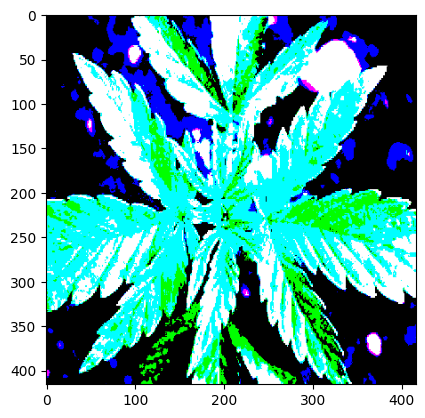

In [43]:
plt.imshow(img[0])

In [44]:
img.shape

(1, 416, 416, 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Healthy'),
  Text(1, 0, 'Manganese Deficiency'),
  Text(2, 0, 'Phosphorus Deficiency'),
  Text(3, 0, 'Potassium Deficiency'),
  Text(4, 0, 'Calcium Deficiency'),
  Text(5, 0, 'PH Fluctuation'),
  Text(6, 0, 'Sulfur Deficiency'),
  Text(7, 0, 'Iron Deficiency'),
  Text(8, 0, 'Nitrogen Deficiency'),
  Text(9, 0, 'Aphids'),
  Text(10, 0, 'Magnesium Deficiency'),
  Text(11, 0, 'Powdery Mildew')])

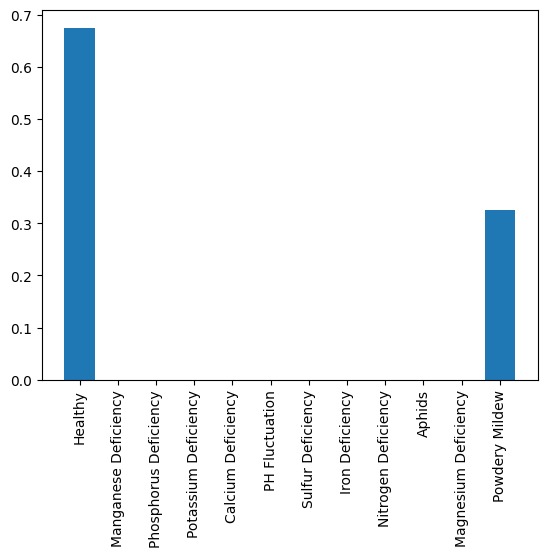

In [47]:
plt.bar(x = ['Healthy','Manganese Deficiency','Phosphorus Deficiency','Potassium Deficiency','Calcium Deficiency','PH Fluctuation','Sulfur Deficiency','Iron Deficiency','Nitrogen Deficiency','Aphids','Magnesium Deficiency','Powdery Mildew'], height = model_tf.predict(img)[0])
plt.xticks(rotation=90)

In [48]:
import shutil

# Zip the folder (replace 'your_folder' with the name of your folder)
shutil.make_archive('data_backup', 'zip', 'your_folder')

# Download the zip file
from google.colab import files
files.download('data_backup.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>